# **Bangluru house price data**

---


In [ ]:
# importing necessory librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **About this file**

In 2017, housing units sold in India dropped by 7% due to demonetization, RERA enforcement, and reduced trust in developers. Bengaluru's property prices fell by nearly 5% in the second half of the year. Various housing options were available, with many apartments priced between ₹42-62 lakh, making home buying complex, especially in cities like Bengaluru.


---



-

## **Problem statement**

---





**Preddiction**

---

- In 2017, housing units sold in India dropped by 7% due to demonetization, RERA enforcement, and reduced trust in developers. Bengaluru's property prices fell by nearly 5% in the second half of the year. Various housing options were available, with many apartments priced between ₹42-62 lakh, making home buying complex, especially in cities like Bengaluru.

**Features**

---

Feature Variables (Predictors):
area_type: This categorical variable describes the type of area, such as "Super built-up Area" or "Plot Area." Different area types may have different price implications.

availability: A categorical variable that indicates when the property will be available, either a specific date or "Ready To Move." Properties ready for immediate possession may have higher or lower prices depending on demand.

location: A categorical variable representing the locality of the property. Location is one of the most important factors in determining property prices.

size: A categorical variable that indicates the size of the property, often described by the number of bedrooms (e.g., "2 BHK" or "4 Bedroom"). Larger homes tend to have higher prices.

society: A categorical variable representing the housing society the property belongs to. Properties in well-known or premium societies may have higher prices. Many missing values in this column may need to be handled.

total_sqft: A mix of numeric and non-numeric values representing the total area of the property in square feet. This variable usually has a direct impact on price, as larger homes are typically more expensive.

bath: A numeric variable indicating the number of bathrooms. More bathrooms often correlate with larger, more expensive homes.

balcony: A numeric variable indicating the number of balconies. Like bathrooms, this can influence price, as more balconies may imply better amenities and larger space.











## **1.Understing the data**

In [ ]:
# loading the Bengaluru_House_Data datset

df=pd.read_csv("/content/Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
# Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
a=df['total_sqft'].value_counts()
print(a.to_string())


total_sqft
1200                 843
1100                 221
1500                 205
2400                 196
600                  180
1000                 172
1350                 133
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 101
1140                  91
2000                  83
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1550                  60
1160                  60
1125                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
700                   52
750                   52
1225                  48
4000                  48
1175          

## **2.Data Cleaning**

In [ ]:
# cheking missing values

missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

location       1
size          16
society     5502
bath          73
balcony      609
dtype: int64


In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
#  Droping the  columns with a high number of missing values

df.drop(columns=["society"],inplace=True)


# droping total_sqft column because it is very complicated column because it has values with many different types
df.drop(columns=["total_sqft"],inplace=True)


# filling missing  values

df["location"].fillna(df["location"].mode()[0],inplace=True) # qualitative data so filling with mode

df["size"].fillna(df["size"].mode()[0],inplace=True) # qualitative data so filling with mode




<ipython-input-14-886f7078a53a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["location"].fillna(df["location"].mode()[0],inplace=True) # qualitative data so filling with mode
<ipython-input-14-886f7078a53a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

<Figure size 3000x1800 with 0 Axes>

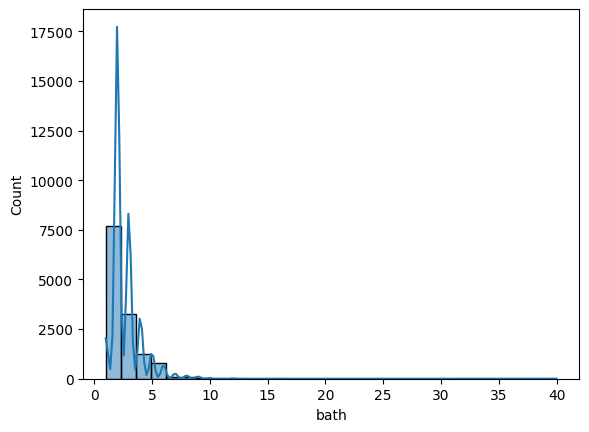

<Figure size 3000x1800 with 0 Axes>

In [ ]:
sns.histplot(df["bath"],bins=30,kde=True)
plt.figure(figsize=(30,18))

In [ ]:
# ploting shows its skewed data  using median() to fill

df["bath"].fillna(df["bath"].median(),inplace=True)

<ipython-input-16-6b37a4063ef8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bath"].fillna(df["bath"].median(),inplace=True)


<Figure size 3000x1800 with 0 Axes>

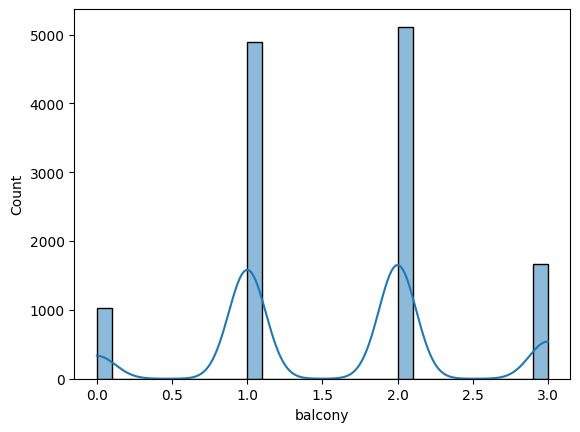

<Figure size 3000x1800 with 0 Axes>

In [ ]:
sns.histplot(df["balcony"],bins=30,kde=True)
plt.figure(figsize=(30,18))

In [ ]:
# ploting shows its normal distributed so mean() to fill

df["balcony"].fillna(df["balcony"].mean(),inplace=True)


<ipython-input-18-3eb8de14706c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["balcony"].fillna(df["balcony"].mean(),inplace=True)


**Wrong format**

---



In [ ]:
df["size"].value_counts()

,count
size,
2 BHK,5215
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


**Changing data types**

---



In [ ]:
# changing float data into int
df["bath"]=df["bath"].astype(int)
df["balcony"]=df["balcony"].astype(int)

In [ ]:
df

,area_type,availability,location,size,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2,1,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,4,0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,5,1,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,2,1,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4,1,488.00


**Removing duplicates**

---



In [ ]:
df.drop_duplicates(inplace=True)
df

,area_type,availability,location,size,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2,1,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,3,3,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,4,0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,5,1,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,2,1,60.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12248 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12248 non-null  object 
 1   availability  12248 non-null  object 
 2   location      12248 non-null  object 
 3   size          12248 non-null  object 
 4   bath          12248 non-null  int64  
 5   balcony       12248 non-null  int64  
 6   price         12248 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 765.5+ KB


In [ ]:
# cheking is the sum still  exist in the data
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
bath,0
balcony,0
price,0


## **3.Descriptive Statistics**

In [ ]:
df.describe()


,bath,balcony,price
count,12248.000000,12248.000000,12248.000000
mean,2.721587,1.549967,115.907577
std,1.375004,0.819529,154.139312
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,74.000000
75%,3.000000,2.000000,125.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df.describe(include="all")

,area_type,availability,location,size,bath,balcony,price
count,12248,12248,12248,12248,12248.000000,12248.000000,12248.000000
unique,4,81,1305,31,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,NaN,NaN,NaN
freq,7826,9656,474,4638,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.721587,1.549967,115.907577
std,NaN,NaN,NaN,NaN,1.375004,0.819529,154.139312
min,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,74.000000
75%,NaN,NaN,NaN,NaN,3.000000,2.000000,125.000000


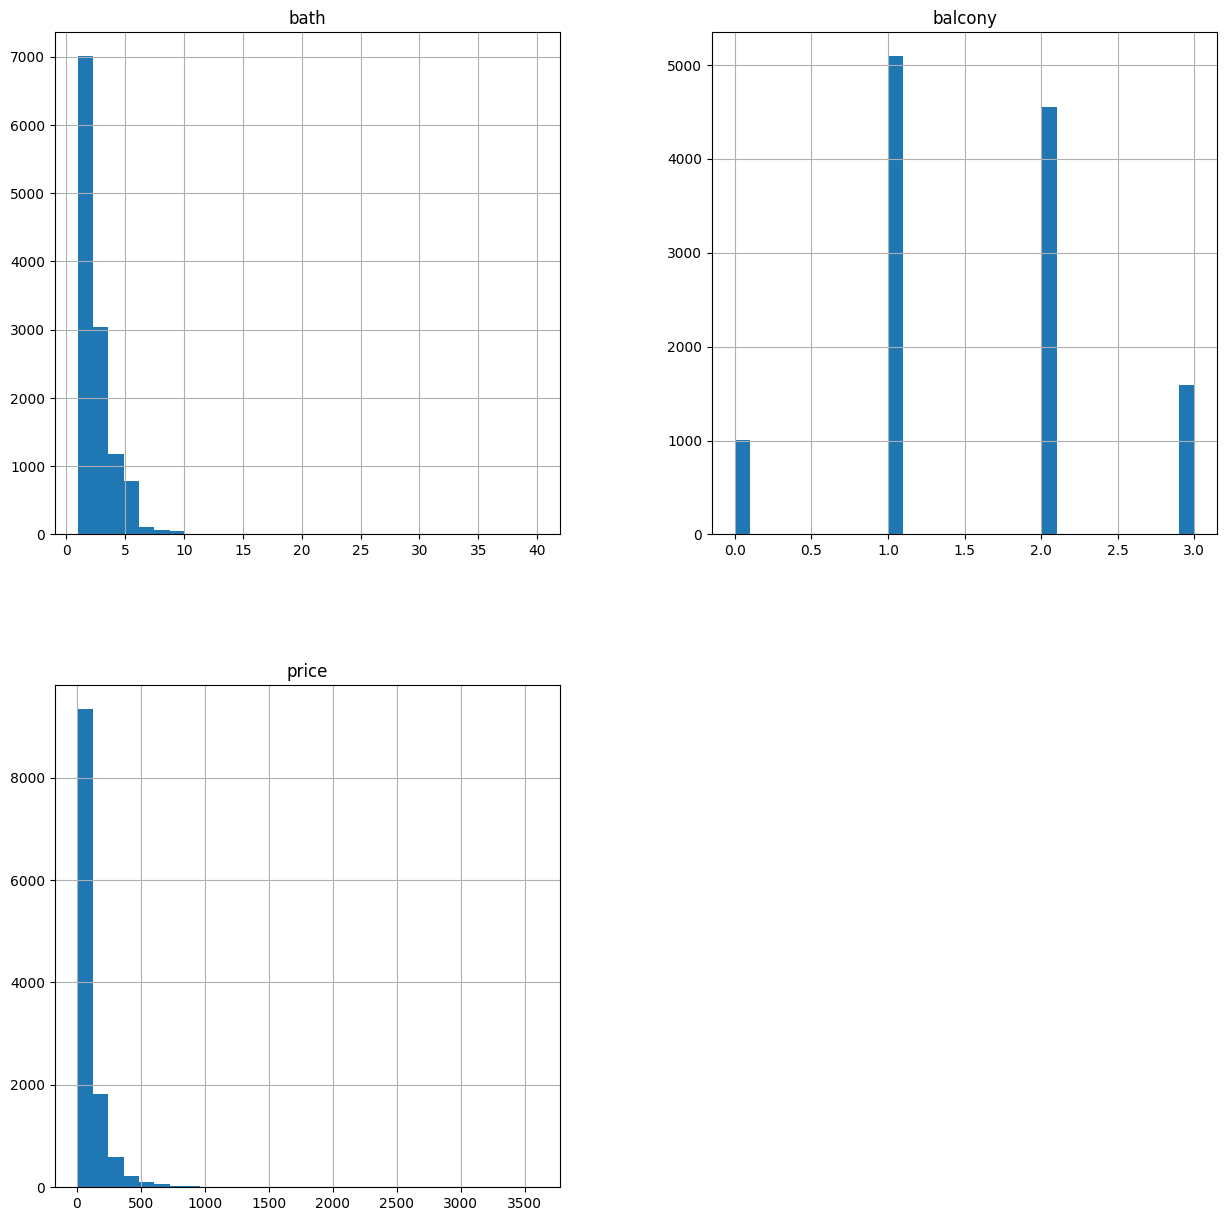

In [ ]:
df.hist(bins=30,figsize=(15,15))
plt.show()

## **4.Data Visualization**

---



In [ ]:
df

,area_type,availability,location,size,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2,1,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,3,3,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,4,0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,5,1,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,2,1,60.00


<Figure size 3000x800 with 0 Axes>

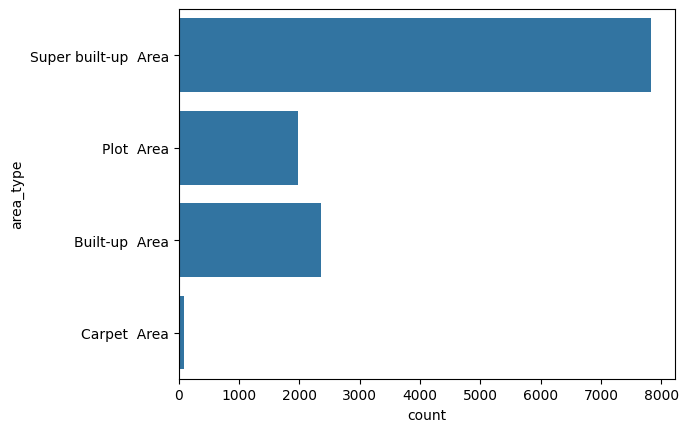

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.countplot(df["area_type"])
plt.figure(figsize=(30,8))

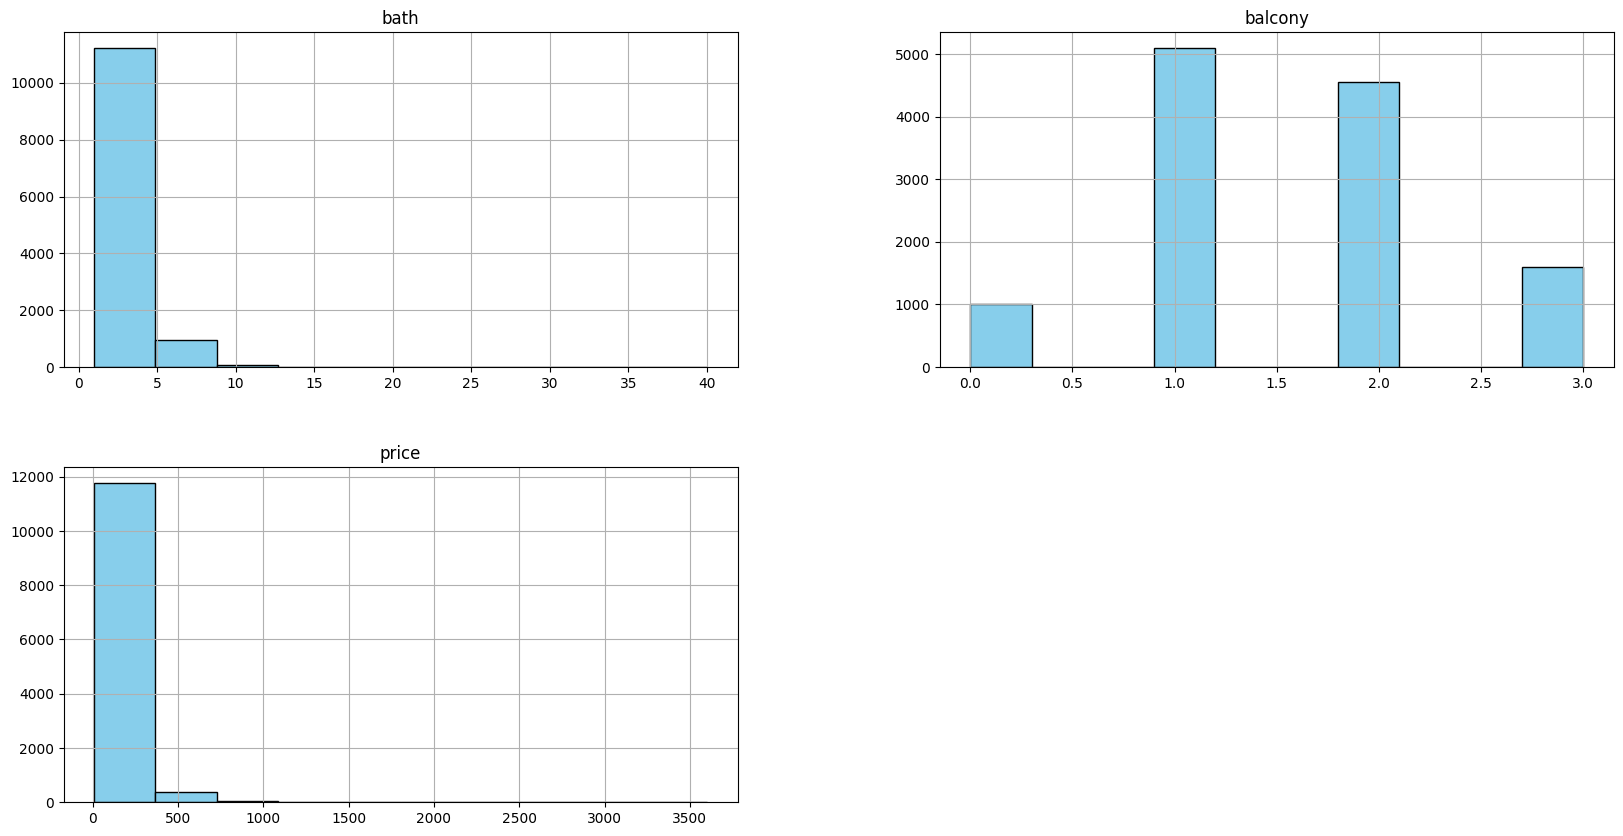

In [ ]:
df.hist(color="skyblue",edgecolor="k",figsize=(20,10),bins=10)
plt.title("Histogram of data",fontsize=20)
plt.show()

<Figure size 3000x800 with 0 Axes>

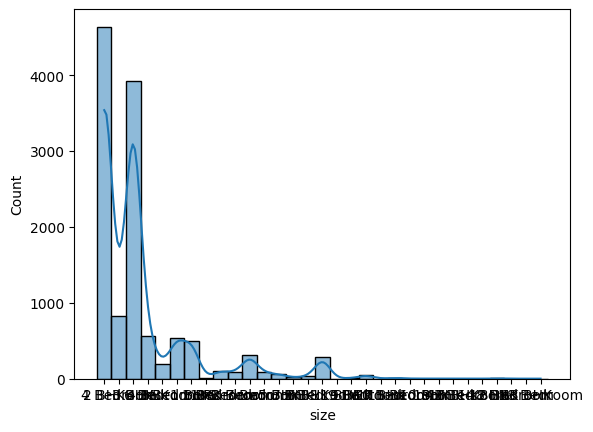

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df["size"],bins=10,kde=True)
plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

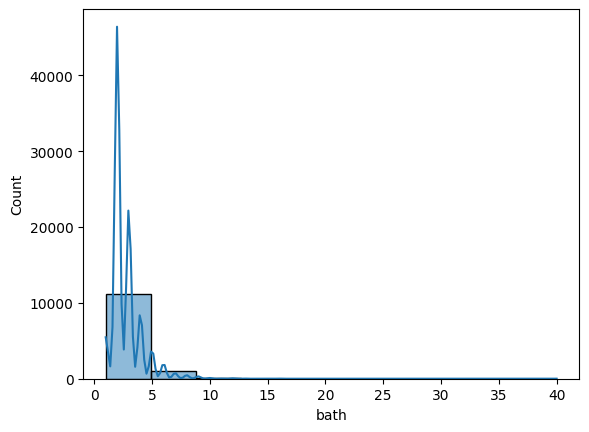

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df["bath"],bins=10,kde=True)
plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

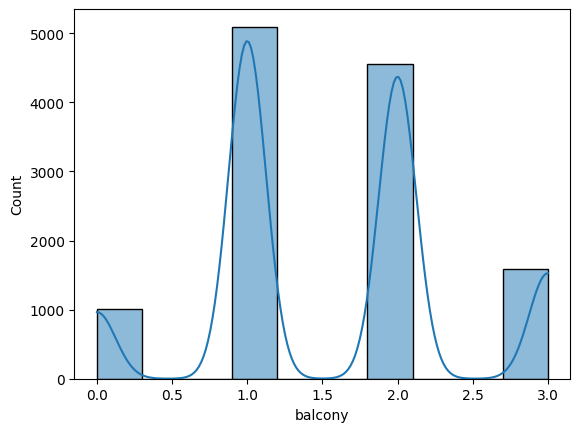

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df["balcony"],bins=10,kde=True)
plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

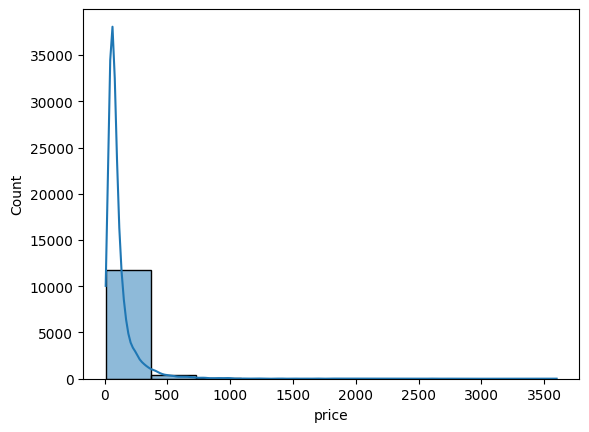

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df["price"],bins=10,kde=True)
plt.figure(figsize=(30,8))

<Axes: xlabel='count', ylabel='area_type'>

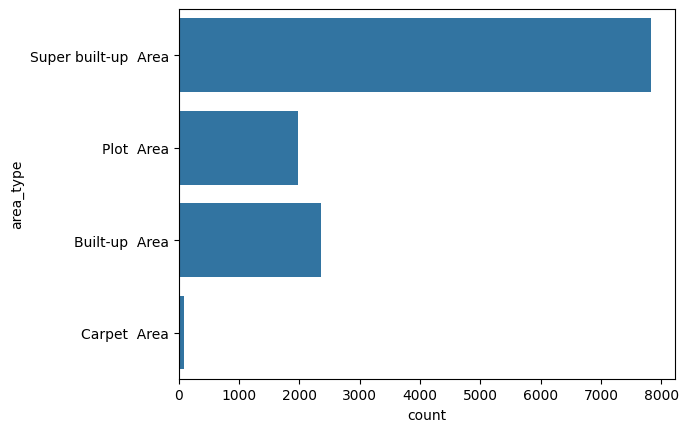

In [ ]:
sns.countplot(df["area_type"])

## **5.Correlation Analysis**

---

**feature engineering**

---



**changing  wrong format feature (size)**

In [ ]:
import pandas as pd

# Define transformation function
def split_features(value):
    if 'BHK' in value:
        # Extract the number before 'BHK' for bedroom
        bedroom = int(value.split()[0])
        hall = 1
        kitchen = 1
    elif 'Bedroom' in value:
        # Extract the number before 'Bedroom' for bedroom
        bedroom = int(value.split()[0])
        hall = 0
        kitchen = 0
    elif value == '1 RK':
        bedroom = 1
        hall = 0
        kitchen = 0
    else:
        bedroom = None
        hall = None
        kitchen = None
    return bedroom, hall, kitchen

# Apply the function to create new columns
df[['Bedroom', 'Hall', 'Kitchen']] = df['size'].apply(lambda x: pd.Series(split_features(x)))

# Display the DataFrame
df


,area_type,availability,location,size,bath,balcony,price,Bedroom,Hall,Kitchen
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2,1,39.07,2,1,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5,3,120.00,4,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2,3,62.00,3,1,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3,1,95.00,3,1,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2,1,51.00,2,1,1
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,3,3,112.00,3,1,1
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,4,0,231.00,5,0,0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,5,1,400.00,4,1,1
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,2,1,60.00,2,1,1


In [ ]:
# droping size column after changing size column into 3 columns

df.drop('size',axis = 1, inplace = True)

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["location"]=labelencoder.fit_transform(df["location"])
df["availability"]=labelencoder.fit_transform(df["availability"])


# replacing "area_type" because its ordinal data so replacing is better accurate
df["area_type"].replace(["Plot  Area","Carpet  Area","Built-up  Area","Super built-up  Area"],[0,1,2,3],inplace=True)
df

<ipython-input-38-c457b174741e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["area_type"].replace(["Plot  Area","Carpet  Area","Built-up  Area","Super built-up  Area"],[0,1,2,3],inplace=True)
<ipython-input-38-c457b174741e>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["area_type"].repl

,area_type,availability,location,bath,balcony,price,Bedroom,Hall,Kitchen
0,3,40,419,2,1,39.07,2,1,1
1,0,80,317,5,3,120.00,4,0,0
2,2,80,1179,2,3,62.00,3,1,1
3,3,80,757,3,1,95.00,3,1,1
4,3,80,716,2,1,51.00,2,1,1
...,...,...,...,...,...,...,...,...,...
13314,3,80,474,3,3,112.00,3,1,1
13315,2,80,1252,4,0,231.00,5,0,0
13316,3,80,1004,5,1,400.00,4,1,1
13317,2,80,972,2,1,60.00,2,1,1


Text(0.5, 1.0, 'Correlation Matrix')

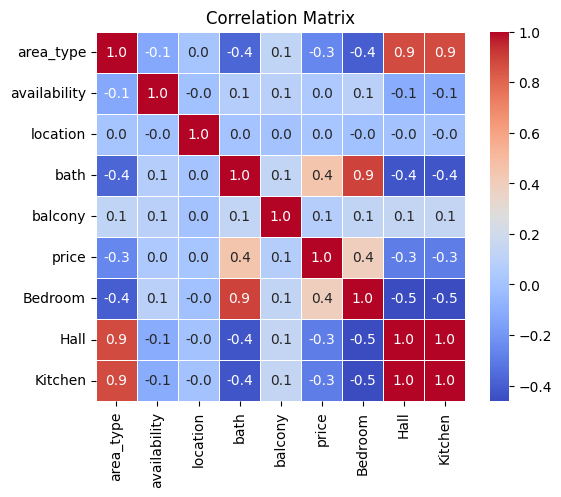

In [ ]:
# Correlation matrix
Corr_matrix = df.corr()

# Heatmap of correlation matrix

sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0.5, robust=True,square=True) # 0.01f should be given for float values.
plt.title('Correlation Matrix')

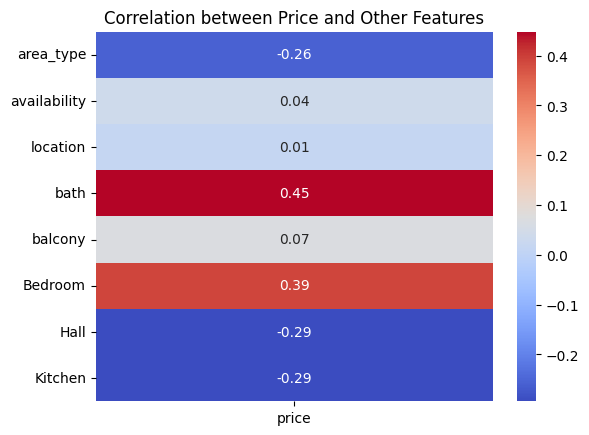

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between 'price' and all other columns
price_corr = df.corr()['price']

# Remove the correlation of 'price' with itself (which is always 1)
price_corr = price_corr.drop('price')

# Create a heatmap to visualize the correlations
sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between Price and Other Features')
plt.show()

In [ ]:
# droping less correlation features

df.drop('location',axis=1,inplace=True)
df.drop('availability',axis=1,inplace=True)

## **Skewnes Detection and log**

<Figure size 3000x800 with 0 Axes>

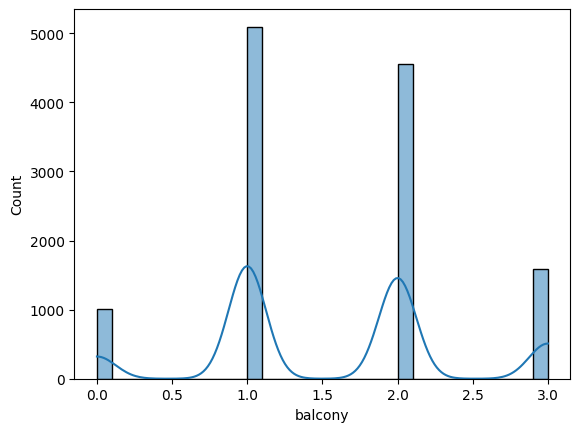

<Figure size 3000x800 with 0 Axes>

In [ ]:
# Normal distribution it is


sns.histplot(df['balcony'],bins=30, kde=True)
plt.figure(figsize=(30,8))

### Area_type

<Figure size 3000x800 with 0 Axes>

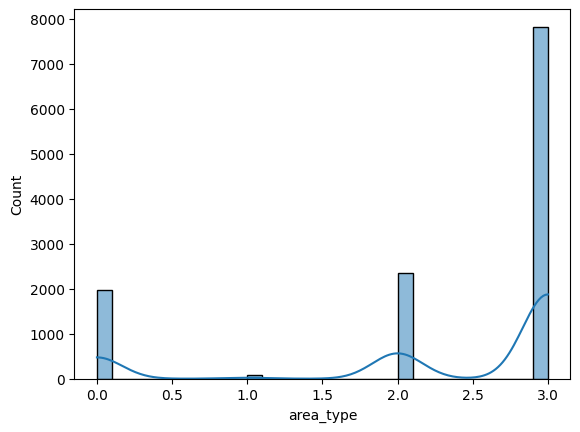

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['area_type'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['area_type'] = np.log1p(df['area_type'])

<Figure size 3000x800 with 0 Axes>

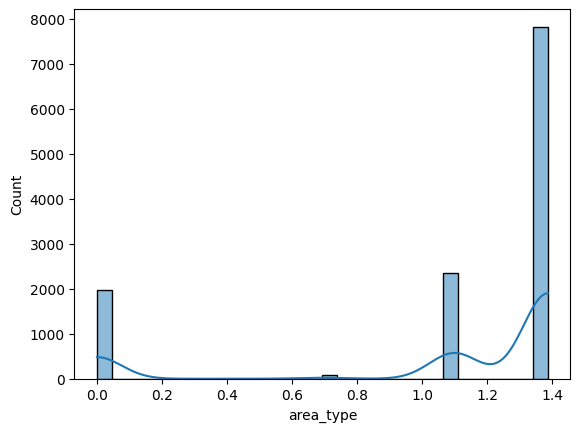

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['area_type'],bins=30, kde=True)
plt.figure(figsize=(30,8))

###bath

<Figure size 3000x800 with 0 Axes>

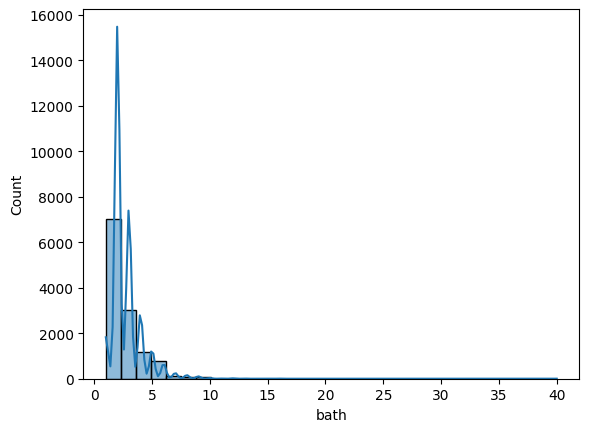

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['bath'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['bath'] = np.log1p(df['bath'])

<Figure size 3000x800 with 0 Axes>

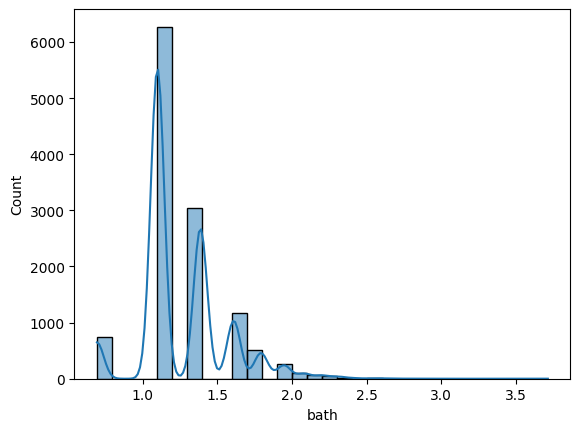

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['bath'],bins=30, kde=True)
plt.figure(figsize=(30,8))

### Bedroom

<Figure size 3000x800 with 0 Axes>

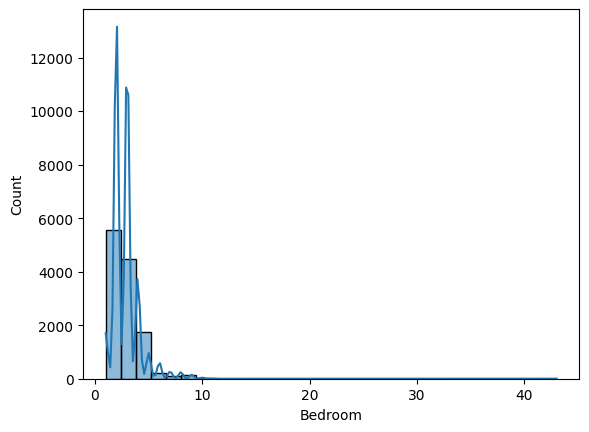

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['Bedroom'],bins=30, kde=True)
plt.figure(figsize=(30,8))


In [ ]:
df['Bedroom'] = np.log1p(df['Bedroom'])

<Figure size 3000x800 with 0 Axes>

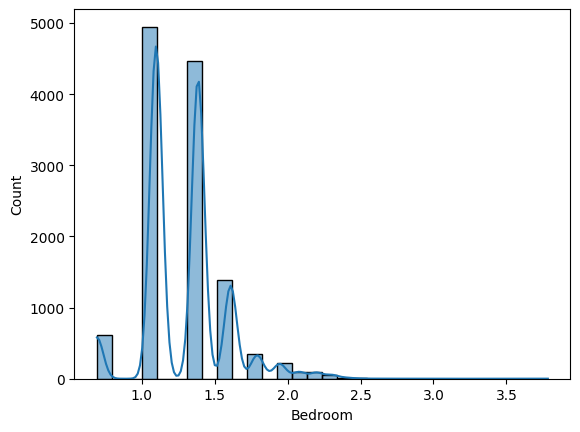

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['Bedroom'],bins=30, kde=True)
plt.figure(figsize=(30,8))


### Hall

<Figure size 3000x800 with 0 Axes>

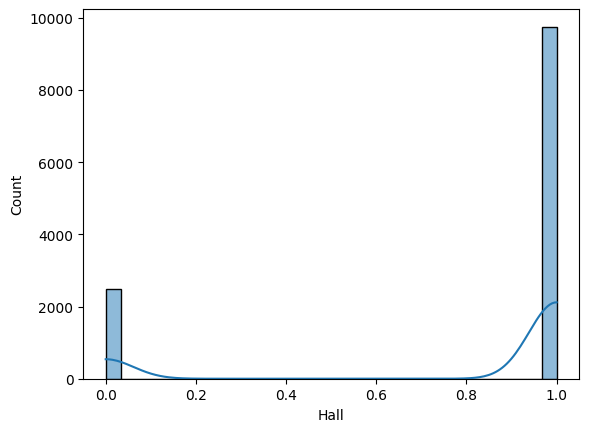

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['Hall'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['Hall'] = np.log1p(df['Hall'])

<Figure size 3000x800 with 0 Axes>

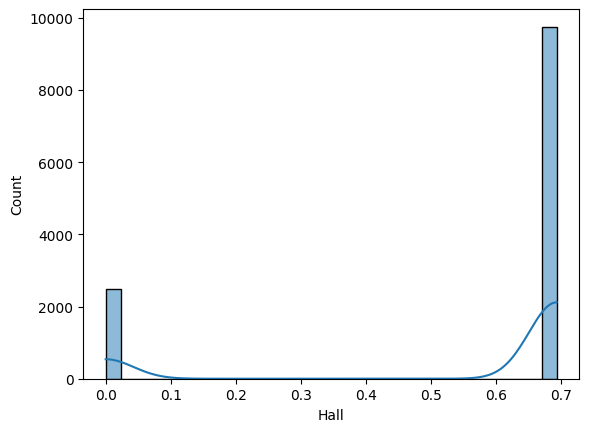

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['Hall'],bins=30, kde=True)
plt.figure(figsize=(30,8))

### Kitchen

<Figure size 3000x800 with 0 Axes>

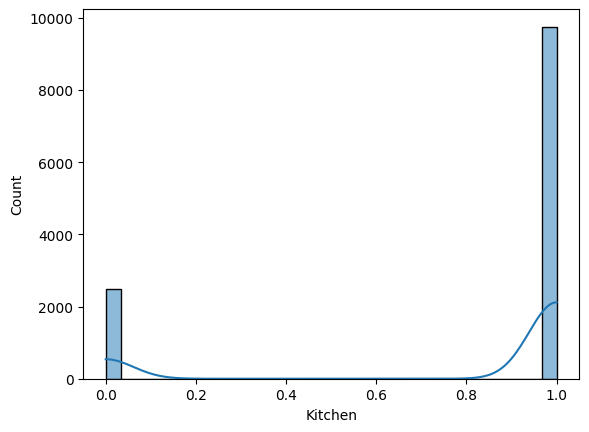

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['Kitchen'],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['Kitchen'] = np.log1p(df['Kitchen'])

<Figure size 3000x800 with 0 Axes>

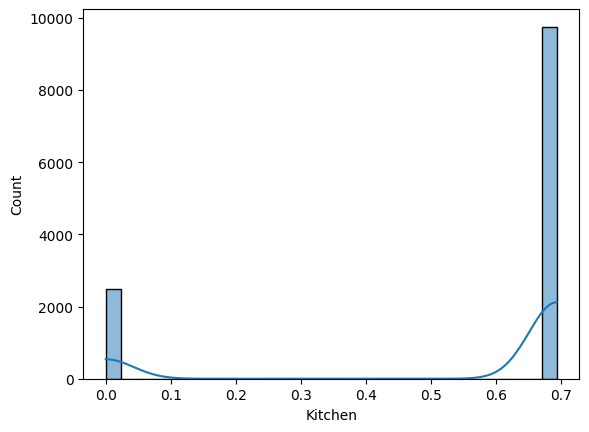

<Figure size 3000x800 with 0 Axes>

In [ ]:
sns.histplot(df['Kitchen'],bins=30, kde=True)
plt.figure(figsize=(30,8))

## **6.Outlier detection**

### balcony

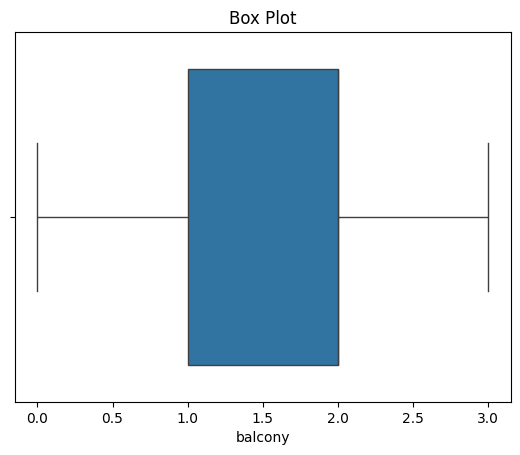

Number of outliers in balcony: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['balcony'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['balcony']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in balcony: {outliers2.shape[0]}')

### area type

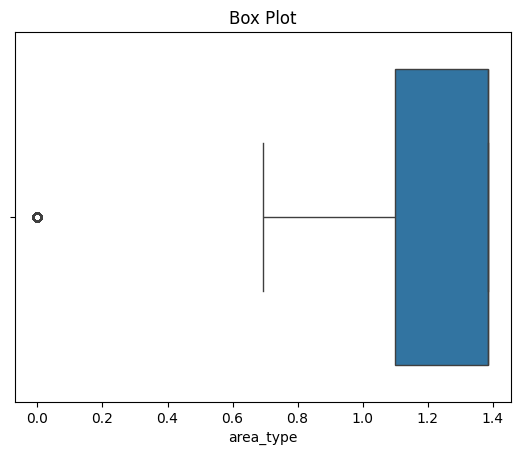

Number of outliers in area_type: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['area_type'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['area_type']))
outliers2 = df[z_scores > 3]
print(f'Number of outliers in area_type: {outliers2.shape[0]}')

###bath

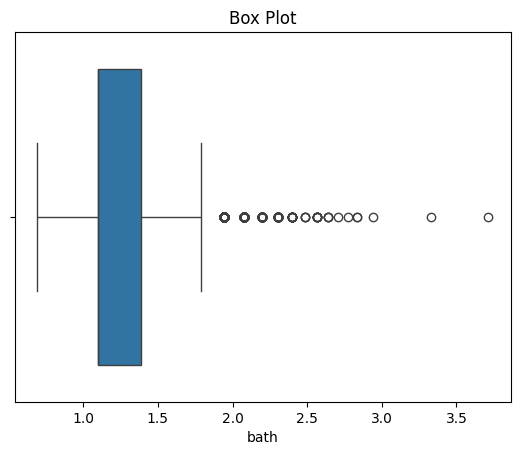

Number of outliers in bath: 139


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['bath'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['bath']))
outliers4 = df[z_scores > 3]
print(f'Number of outliers in bath: {outliers4.shape[0]}')

### Bedroom

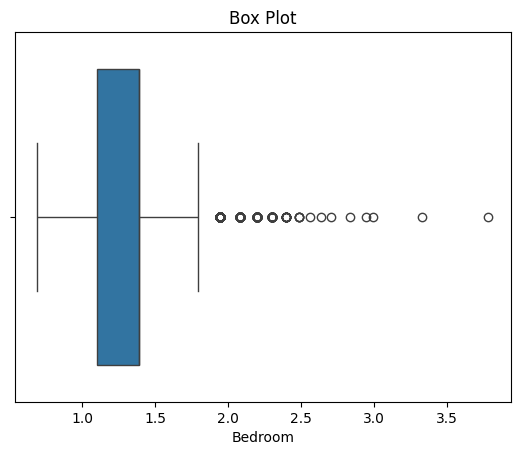

Number of outliers in Bedroom: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['Bedroom'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Bedroom']))
outliers7 = df[z_scores > 3]
print(f'Number of outliers in Bedroom: {outliers2.shape[0]}')

### hall

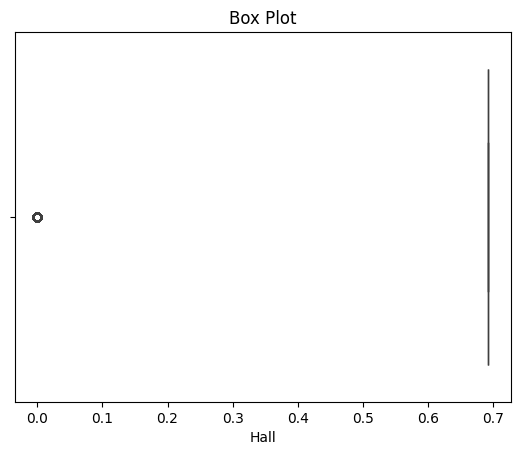

Number of outliers in Hall: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['Hall'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Hall']))
outliers8 = df[z_scores > 3]
print(f'Number of outliers in Hall: {outliers2.shape[0]}')

### kitchen

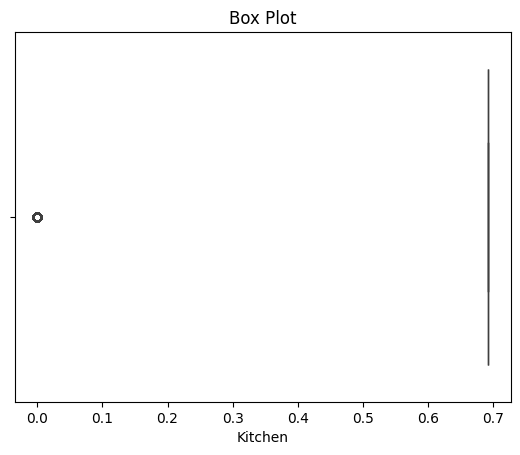

Number of outliers in Kitchen: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['Kitchen'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['Kitchen']))
outliers9 = df[z_scores > 3]
print(f'Number of outliers in Kitchen: {outliers2.shape[0]}')

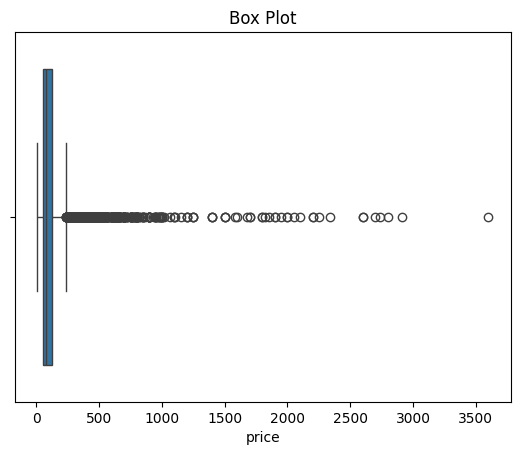

Number of outliers in price: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['price'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['price']))
outliers10 = df[z_scores > 3]
print(f'Number of outliers in price: {outliers2.shape[0]}')

## **cheking and removing outliers**

In [ ]:
df.shape

(12248, 7)

<Axes: >

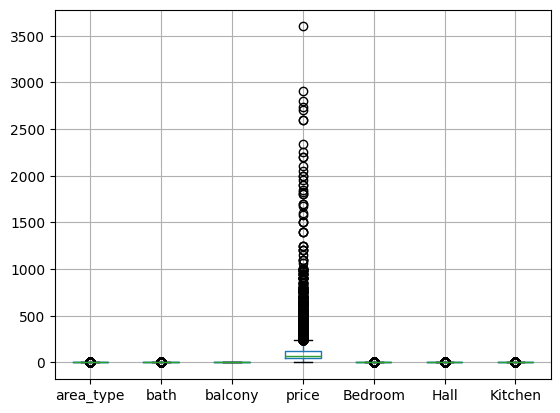

In [ ]:
df.boxplot()

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='price')
df_cleaned


,area_type,bath,balcony,price,Bedroom,Hall,Kitchen
0,1.386294,1.098612,1,39.07,1.098612,0.693147,0.693147
2,1.098612,1.098612,3,62.00,1.386294,0.693147,0.693147
3,1.386294,1.386294,1,95.00,1.386294,0.693147,0.693147
4,1.386294,1.098612,1,51.00,1.098612,0.693147,0.693147
5,1.386294,1.098612,1,38.00,1.098612,0.693147,0.693147
...,...,...,...,...,...,...,...
13312,1.386294,1.098612,2,47.00,1.098612,0.693147,0.693147
13314,1.386294,1.386294,3,112.00,1.386294,0.693147,0.693147
13316,1.386294,1.791759,1,400.00,1.609438,0.693147,0.693147
13317,1.098612,1.098612,1,60.00,1.098612,0.693147,0.693147


In [ ]:
df=df_cleaned
df.shape

(9597, 7)

## **7.Feature Engineering**

**we already did an feature engineering in correlation step**

---



In [ ]:
# import pandas as pd

# # Define transformation function
# def split_features(value):
#     if 'BHK' in value:
#         # Extract the number before 'BHK' for bedroom
#         bedroom = int(value.split()[0])
#         hall = 1
#         kitchen = 1
#     elif 'Bedroom' in value:
#         # Extract the number before 'Bedroom' for bedroom
#         bedroom = int(value.split()[0])
#         hall = 0
#         kitchen = 0
#     elif value == '1 RK':
#         bedroom = 1
#         hall = 0
#         kitchen = 0
#     else:
#         bedroom = None
#         hall = None
#         kitchen = None
#     return bedroom, hall, kitchen

# # Apply the function to create new columns
# df[['Bedroom', 'Hall', 'Kitchen']] = df['size'].apply(lambda x: pd.Series(split_features(x)))

# # Display the DataFrame
# df

In [ ]:
df1=df

## **8.Dimensionality reduction**

---



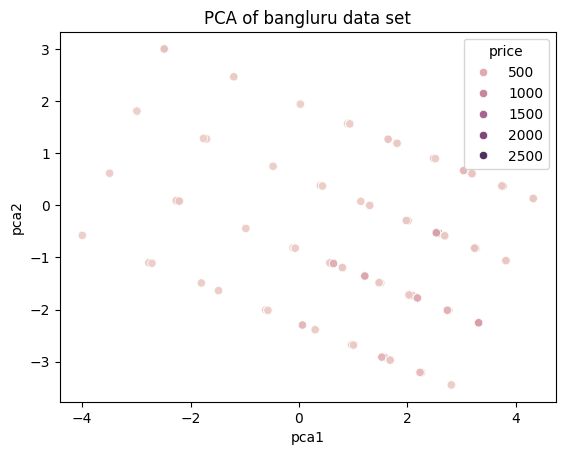

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['Bedroom', 'bath', 'balcony']
scaler = StandardScaler().fit_transform(df[features])


# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # choosing 2 n_components
pca_result = pca.fit_transform(scaler)


# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]


# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2',hue="price", data=df)
plt.title('PCA of bangluru data set')
plt.show()



## **9.Data Scaling**

---



**We alredy scaled data with standard scalar**

---



In [ ]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Assuming  DataFrame is called 'df'
# # Select the features that  want to scale
# features = ['Bedroom', 'bath', 'balcony']

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit the scaler to  data and transform it
# scaled_data = scaler.fit_transform(df[features])

# # Create a new DataFrame with the scaled data (optional)
# scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)







### **predicting scaled data**

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Bedroom', 'bath', 'balcony',"pca1","pca2"]]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 12000.096163071328, RMSE: 109.54495042251527, R-squared: 0.19327504631667292


In [ ]:

dfa=df
df1=df
df2=df

## **10.Initial modeling and Hypothesis testing**

---



**After scaling and dimensionality reduction we assumed that after predicting mse higher so we didnt selecting that features**

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Bedroom', 'bath', 'balcony']]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state


In [ ]:

from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")


MSE: 12000.069944929199, RMSE: 109.54483075403056, R-squared: 0.1932768088716732


## **another prediction methods**

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
X = dfa[['Bedroom', 'bath', 'balcony']]  # Features
y = dfa['price']  # Target variable

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Bedroom,bath,balcony
6857,0.693147,0.693147,1
10482,1.098612,1.098612,1
4323,1.386294,1.098612,3
9485,1.098612,1.098612,2
1543,1.386294,1.386294,2
...,...,...,...
7682,1.386294,1.386294,3
6925,1.098612,1.098612,1
7206,1.098612,1.098612,2
1083,1.098612,1.098612,1


In [ ]:
y_train

,price
6857,43.82
10482,31.48
4323,73.00
9485,55.00
1543,100.00
...,...
7682,85.00
6925,49.50
7206,38.00
1083,61.92


In [ ]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [ ]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                MAE        RMSE        R²
Linear Regression         43.792662  120.671776  0.183639
Ridge Regression          43.775696  120.679947  0.183528
Lasso Regression          43.297562  121.328108  0.174734
ElasticNet Regression     49.709282  130.967417  0.038393
Decision Tree             38.333290  116.190810  0.243142
Random Forest             38.299239  116.434430  0.239964
Gradient Boosting         38.231469  116.345432  0.241126
Support Vector Regressor  37.920850  123.286478  0.147878
K-Nearest Neighbors       39.172517  119.700251  0.196731
Neural Network            38.025235  114.211094  0.268713
